#### Load libraries and data

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

# Load the iris dataset from sklearn
iris = datasets.load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


#### Basic plots

We make a basic plot to understand the distribution of the variables, so we can understand the behavior.

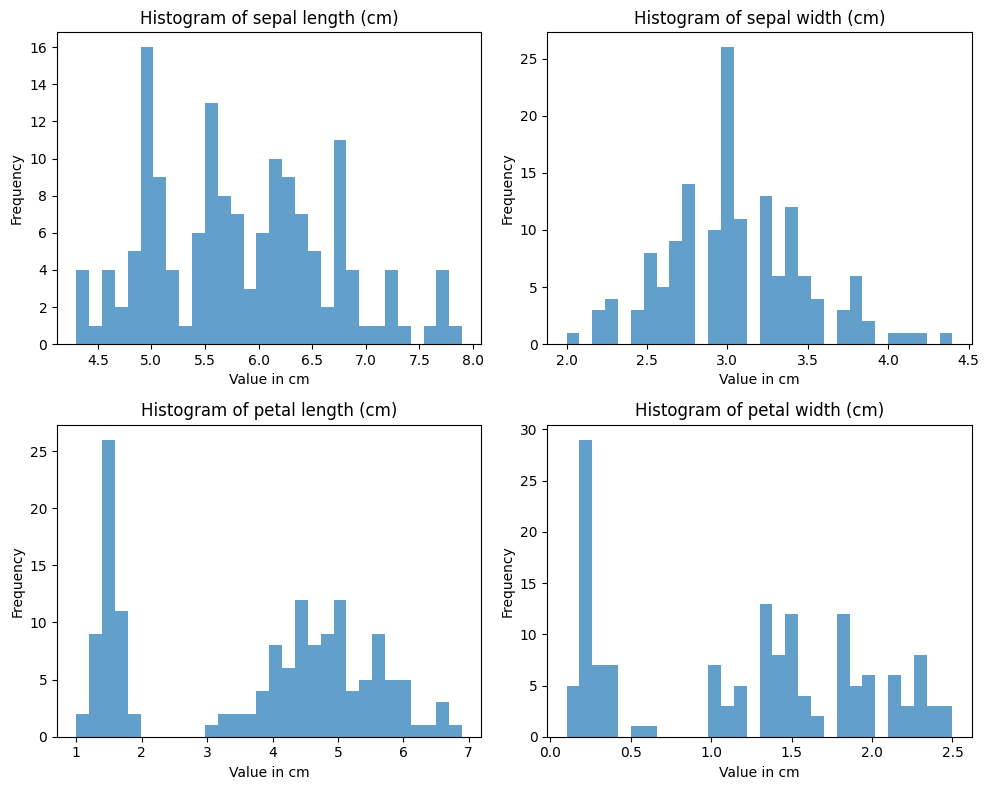

In [2]:
import matplotlib.pyplot as plt

######### histogramas en matriz 2x2

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(df_iris.columns[:-1]):
    axes[i].hist(df_iris[col], bins=30, alpha=0.7, label=col)   
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Value in cm') 
    axes[i].set_ylabel('Frequency')
    # axes[i].legend()

plt.tight_layout()
plt.show()

We can use this distributions to add better limits to the following scatterplots

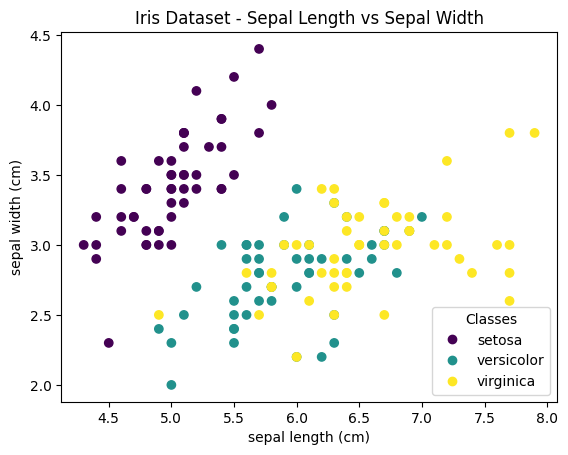

(1.0, 6.0)

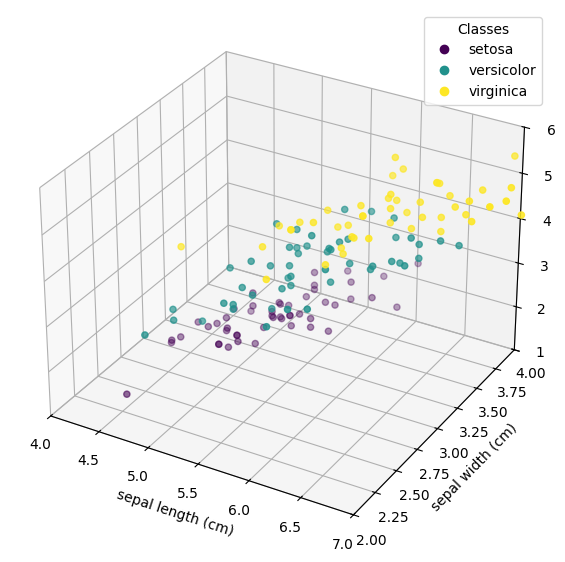

In [5]:
########## Simple scatter plot
_, ax = plt.subplots()
scatter = ax.scatter(df_iris.iloc[:, 0], df_iris.iloc[:, 1], c=df_iris['target'])
ax.set(xlabel=df_iris.columns[0], ylabel=df_iris.columns[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
ax.set_title("Iris Dataset - Sepal Length vs Sepal Width")
plt.show()

########## 3D scatter plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_iris.iloc[:, 0], df_iris.iloc[:, 1], df_iris.iloc[:, 2], c=df_iris['target'])
ax.set(xlabel=df_iris.columns[0], ylabel=df_iris.columns[1], zlabel=df_iris.columns[2])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="upper right", title="Classes"
)
ax.set_xlim([4, 7])
ax.set_ylim([2,4])
ax.set_zlim([1, 6])

## Classification methods

In this section, we will evaluate different classification methods suitable for the Iris dataset, which is a classic dataset in machine learning. The goal is to classify iris flowers into three species based on their sepal and petal dimensions.

### Linear Regression (Logistic regression)
Although primarily used for regression tasks, linear regression can be adapted for classification through techniques like logistic regression. It models the relationship between the features and the probability of a class using the logistic function:
$$
P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}}
$$
### Decision Trees 
Decision trees are a non-parametric supervised learning method used for classification and regression. They work by splitting the data into subsets based on feature values, creating a tree-like model of decisions. The Gini impurity is often used to measure the quality of a split:
$$
Gini(D) = 1 - \sum_{i=1}^{C} (p_i)^2
$$
where $p_i$ is the probability of class $i$ in dataset $D$.

### Random Forest
Random forests are an ensemble method that combines multiple decision trees to improve classification accuracy. It reduces overfitting by averaging the results of individual trees, making it robust against noise. The overall prediction is made by majority voting among the trees:
$$
\hat{y} = \text{mode}(y_1, y_2, ..., y_T)
$$
where $T$ is the number of trees.

### Neural Network
Neural networks are a set of algorithms modeled loosely after the human brain. They are particularly effective for complex classification tasks and can learn intricate patterns in data through multiple layers of interconnected nodes. The output of a neuron can be expressed as:
$$
output = f(\sum_{i=1}^{n} w_i x_i + b)
$$
where $w_i$ are the weights, $x_i$ are the inputs, $b$ is the bias, and $f$ is the activation function.

#### Data separation and train-test-split

### Linear Regression/Clasification

In [ ]:
# Separate data and target

X, y = df_iris.iloc[:, :4].values, df_iris['target'].values 




[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.